In [1]:
#Load final Dataset 
import pandas as pd 
import numpy as np
import sys
import math
sys.path.append('../')
from utils.emotion import *

pd.set_option('display.max_columns', None)

#Load the final dataset
df = pd.read_csv("../data/processed/df_final.csv")
df.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,WikiMovieID,CharacterName,CharacterID,Instances,CharacterActorMap,ActorID,ActorName,ActorAge,ActorGender,ActorBirthDate,ActorHeight,merge_title,merge_year,movieId,title,mean,std,count
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...","Set in the second half of the 22nd century, th...",975900.0,"{1: 'Akooshay', 2: 'Lieutenant Melanie Ballard...","{1: '/m/0bgcj3x', 2: '/m/0bgchn4', 3: '/m/0bgc...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: na...","{1: '/m/0bgchxw', 2: '/m/0jys3m', 3: '/m/0jys3...","{1: '/m/03wcfv7', 2: '/m/0346l4', 3: '/m/01vw2...","{1: 'Wanda De Jesus', 2: 'Natasha Henstridge',...","{1: 42.0, 2: 27.0, 3: 32.0, 4: 33.0, 5: 23.0, ...","{1: 'F', 2: 'F', 3: 'M', 4: 'M', 5: 'F', 6: 'F...","{1: '1958-08-26', 2: '1974-08-15', 3: '1969-06...","{1: 1.62, 2: 1.78, 3: 1.727, 4: 1.75, 5: 1.65,...",ghosts of mars,2001.0,4735.0,Ghosts of Mars (2001),2.35196,1.064942,1709.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp...",NaN,3196793.0,"{1: 'Police Officer', 2: 'Reporter', 3: nan, 4...","{1: '/m/0lr3z80', 2: '/m/0lr3z8g', 3: nan, 4: ...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: na...","{1: '/m/0lr37fl', 2: '/m/0lr37d8', 3: '/m/0lr3...","{1: '/m/0h8pnlw', 2: '/m/034dbm', 3: '/m/0lr37...","{1: 'Allen Cutler', 2: 'Alice Barrett', 3: 'Ro...","{1: nan, 2: 43.0, 3: nan, 4: nan, 5: 50.0, 6: ...","{1: 'M', 2: 'F', 3: 'M', 4: 'F', 5: 'M', 6: 'M...","{1: nan, 2: '1956-12-19', 3: nan, 4: nan, 5: '...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: 1....",getting away with murder: the jonbenét ramsey ...,2000.0,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",NaN,28463795.0,"{1: nan, 2: nan, 3: nan, 4: nan}","{1: nan, 2: nan, 3: nan, 4: nan}","{1: nan, 2: nan, 3: nan, 4: nan}","{1: '/m/0gct1bn', 2: '/m/0gct1bv', 3: '/m/0gct...","{1: '/m/053j7xf', 2: '/m/0gct1by', 3: '/m/0bwh...","{1: 'Frank Krog', 2: 'Kristin Kajander', 3: 'V...","{1: 33.0, 2: 28.0, 3: 40.0, 4: 30.0}","{1: 'M', 2: 'F', 3: 'M', 4: 'F'}","{1: '1954-10-05', 2: '1959-02-28', 3: '1947', ...","{1: nan, 2: nan, 3: nan, 4: nan}",brun bitter,1988.0,NaN,NaN,NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic...",A series of murders of rich young women throug...,9363483.0,"{1: nan, 2: nan}","{1: nan, 2: nan}","{1: nan, 2: nan}","{1: '/m/02t9_0c', 2: '/m/02vct27'}","{1: '/m/036496', 2: '/m/07g60h'}","{1: 'David Keith', 2: 'Cathy Moriarty'}","{1: 32.0, 2: 26.0}","{1: 'M', 2: 'F'}","{1: '1954-05-08', 2: '1960-11-29'}","{1: 1.83, 2: 1.75}",white of the eye,1987.0,90015.0,White of the Eye (1987),3.00000,1.038328,33.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",{'/m/04306rv': 'German Language'},{'/m/0345h': 'Germany'},{'/m/07s9rl0': 'Drama'},"

In [4]:

model, tokenizer= model_and_tokenizer()
#try the model 
model("I am happy", truncation=True)

[[{'label': 'joy', 'score': 0.9657409191131592},
  {'label': 'surprise', 'score': 0.01603241078555584},
  {'label': 'sadness', 'score': 0.013527712784707546},
  {'label': 'neutral', 'score': 0.0026094652712345123},
  {'label': 'anger', 'score': 0.0013809324009343982},
  {'label': 'fear', 'score': 0.0003798553079832345},
  {'label': 'disgust', 'score': 0.00032876688055694103}]]

In [5]:
df['emotions']= df['Plot'].apply(lambda x: model(x, truncation = True) if pd.notna(x) else None)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


# Time Series Analysis

Time series analysis involves the study of data points collected or recorded at specific time intervals. The goal is to identify meaningful statistics and characteristics of the data. Time series data can be decomposed into several components, typically including trend, seasonality, and noise.

## Components of Time Series

1. **Trend (T_t)**: The long-term progression of the series. It represents the general direction in which the data is moving over a long period.
2. **Seasonality (S_t)**: The repeating short-term cycle in the series. It captures the periodic fluctuations.
3. **Noise (N_t)**: The random variation in the series. It represents the irregular fluctuations that do not follow a pattern.

Mathematically, a time series can be represented as:

$$Y_t = T_t + S_t + N_t$$

or in a multiplicative form:

$$Y_t = T_t \times S_t \times N_t$$

## Application

We are going to perform time series analysis on emotion classification results from movie plots.

After conducting an emotion classification task on 40,000 movie plots, resulting in 8 different emotion classes, each with a respective probability for each plot. The goal is to analyze how these emotions have changed over the years.

The steps involved are:
1. Calculate the average probability of each emotion for each year.
2. Perform time series analysis on each emotion to observe trends and changes over time.
3. Model these time series using statistical methods.

Possible statistical models for time series analysis include:
- **ARIMA (AutoRegressive Integrated Moving Average)**
    Trying to model the next value in the series as a linear combination of the previous values and the previous errors.
    - Formula: ARIMA(p, d, q)
    - General form: $$\Delta^d Y_t = \phi_1 \Delta^d Y_{t-1} + \cdots + \phi_p \Delta^d Y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q}$$

- **SARIMA (Seasonal AutoRegressive Integrated Moving Average)**
    Extends ARIMA to include seasonality.
    - Formula: SARIMA(p, d, q)(P, D, Q, s)
    - General form: $$\Delta^d Y_t = \phi_1 \Delta^d Y_{t-1} + \cdots + \phi_p \Delta^d Y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q} + \text{seasonal terms}$$

- **Exponential Smoothing State Space Model (ETS)**
    A flexible model that can capture different types of trends and seasonaliy.
    - Formula: ETS(A, Ad, N)
    - General form: $$Y_t = (\text{level} + \text{trend} + \text{seasonality}) \times \text{error}$$

- **GARCH (Generalized Autoregressive Conditional Heteroskedasticity)**
    A model for analyzing and forecasting time series data that includes autoregressive and moving average terms for the variance.
    - Formula: GARCH(p, q)
    - General form: $$\sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \cdots + \alpha_p \epsilon_{t-p}^2 + \beta_1 \sigma_{t-1}^2 + \cdots + \beta_q \sigma_{t-q}^2$$

These models will help us understand the temporal dynamics of emotions in movie plots and potentially forecast future trends.




Just for give an example here is a setup where we generated a random series from an ARIMA(1,1,1) model.

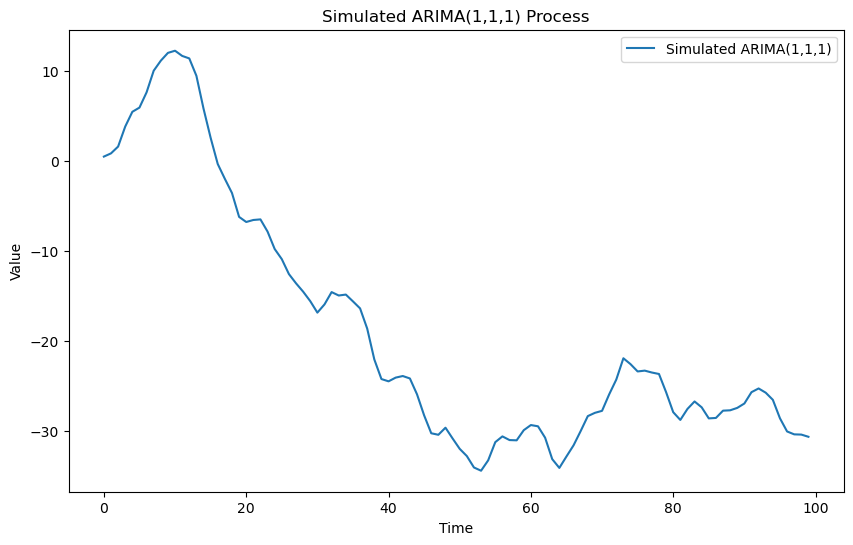

In [25]:


from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

import matplotlib.pyplot as plt

# Define the autoregressive and moving average coefficients
ar = np.array([1, -0.5])
ma = np.array([1, 0.5])
arma_process = ArmaProcess(ar, ma)

# Simulate an ARMA(1,1) prcess
np.random.seed(42)
simulated_data = arma_process.generate_sample(nsample=100)

# Integrate the data to 
integrated_data = np.cumsum(simulated_data)

# Plot the integrated data
plt.figure(figsize=(10, 6))
plt.plot(integrated_data, label='Simulated ARIMA(1,1,1)')
plt.title('Simulated ARIMA(1,1,1) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# Cluster Analysis

Cluster anaysis is a statistical technique used to group similar objects into clusters, where objects in the same cluster are more similar to each other than to those in other clusters. This technique is widely used in various fields such as data mining, pattern recognition, image analysis, and bioinformatics.

## Mathematical Notation

Given a set of $ n $ objects $ X = \{x_1, x_2, \ldots, x_n\} $, cluster analysis aims to partition these objects into $ k $ clusters $ C = \{C_1, C_2, \ldots, C_k\} $ such that:

1. $ \bigcup_{i=1}^{k} C_i = X $ (each object belongs to exactly one cluster)
2. $ C_i \cap C_j = \emptyset$ for $ i \neq j $ (clusters are mutually exclusive)

The similarity or dissimilarity between objects is often measured using a distance metric $ d(x_i, x_j) $. Common distance metrics include:

- Euclidean distance: $ d(x_i, x_j) = \sqrt{\sum_{m=1}^{p} (x_{im} - x_{jm})^2} $
- Manhattan distance: $ d(x_i, x_j) = \sum_{m=1}^{p} |x_{im} - x_{jm}| $
- Cosine similarity: $ d(x_i, x_j) = 1 - \frac{\sum_{m=1}^{p} x_{im} x_{jm}}{\sqrt{\sum_{m=1}^{p} x_{im}^2} \sqrt{\sum_{m=1}^{p} x_{jm}^2}} $

## Clustering Algorithms

Several algorithms can be used to perform cluster analysis, including:

1. **K-means clustering**: This algorithm partitions the data into $ k $ clusters by minimizing the within-cluster sum of squares (WCSS):
    $$
    \text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
    $$
    where $ \mu_i $ is the centroid of cluster $ C_i $.

2. **Hierarchical clustering**: This algorithm builds a hierarchy of clusters either by agglomerative (bottom-up) or divisive (top-down) approaches. The result is often visualized using a dendrogram.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: This algorithm groups together points that are closely packed together, marking points that are in low-density regions as outliers.

4. **Gaussian Mixture Models (GMM)**: This algorithm assumes that the data is generated from a mixture of several Gaussian distributions with unknown parameters. It uses the Expectation-Maximization (EM) algorithm to estimate the parameters.

## Evaluation Metrics

To evaluate the quality of clustering, several metrics can be used, including:

- **Silhouette score**: Measures how similar an object is to its own cluster compared to other clusters.
  $$
  s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
  $$
  where $ a(i) $ is the average distance between $ i $ and all other points in the same cluster, and $ b(i) $ is the minimum average distance between $ i $ and points in a different cluster.

- **Davies-Bouldin index**: Measures the average similarity ratio of each cluster with its most similar cluster.
  $$
  DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(\mu_i, \mu_j)} \right)
  $$
  where $ \sigma_i$ is the average distance between each point in cluster $i$ and the centroid $\mu_i $, and $ d(\mu_i, \mu_j) $ is the distance between centroids $ \mu_i $ and $ \mu_j $.

Cluster analysis is a powerful tool for discovering patterns and structures in data, making it an essential technique in exploratory data analysis and machine learning.